In [24]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters.rank import entropy 
from skimage.morphology import disk 
import glob 
import pickle 
from matplotlib import pyplot as plt
h=100
w=128 

In [25]:
def getred(img):
    ir=[]
    for i in range(h):
        for j in range(w):
            ir.append(img[i][j][0])
            #print(imgo[i][j],1)
    ir=np.array(ir)
    print(ir.shape)
    irr=np.reshape(ir,(h,w))
    irr.shape
    return irr
def getgreen(img):
  ig=[]
  for i in range(h):
      for j in range(w):
          ig.append(img[i][j][1])
          #print(imgo[i][j],2)
  ig=np.array(ig)
  print(ig.shape)
  igg=np.reshape(ig,(h,w))
  igg.shape
  return igg
def getblue(img):
  ib=[]
  for i in range(h):
      for j in range(w):
          ib.append(img[i][j][2])
          #print(imgo[i][j],3)
  ib=np.array(ib)
  print(ib.shape)
  ibb=np.reshape(ib,(h,w))
  ibb.shape  
  return ibb

In [26]:
import numpy as np
import cv2
import pandas as pd

def feature_extraction(img):
    df = pd.DataFrame()
#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe

    print(df)
    return df

# Red

C:\Users\sudhakararao\Desktop\Project\colorseg\t1.jpg
C:\Users\sudhakararao\Desktop\Project\colorseg\t2.jpg
C:\Users\sudhakararao\Desktop\Project\colorseg\t3.jpg
C:\Users\sudhakararao\Desktop\Project\colorseg\t4.jpg
4
C:\Users\sudhakararao\Desktop\Project\colorseg1\t1outnew.png
C:\Users\sudhakararao\Desktop\Project\colorseg1\t2outnew.png
C:\Users\sudhakararao\Desktop\Project\colorseg1\t3outnew.png
C:\Users\sudhakararao\Desktop\Project\colorseg1\t4outnew.png
4


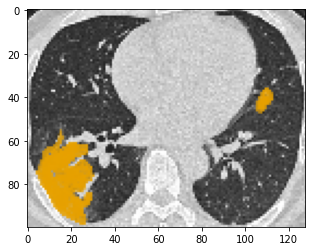

In [27]:
path=r'C:\Users\sudhakararao\Desktop\Project'
l=['colorseg','colorseg1']
all1=[]
for i in l:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset):
        imagepath=os.path.join(dataset,j)
        print(imagepath)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all1.append(img)
        c+=1
    print(c)

(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                  34       0       0     249     126      81      41      33   
1                  36       0       0     255     136     100      44      40   
2                  55       0       0     255     167     128      54      52   
3                  65       0       0     255     218     152      70      62   
4                  46       0       0     255     255     180      94      73   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             183       0       0     255     255     255     188     139   
12796             212       0       0     255     255     255     187     140   
12797             201       0       0     255     255     255     187     139   
12798             207       0       0     255     255     255     187     138   
12799             208       0       0     255     255     255     187     135   

       Gabor8  Gab

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 190       0       0     255     255     255     181     134   
1                 199       0       0     255     255     255     181     134   
2                 200       0       0     255     255     255     182     134   
3                 209       0       0     255     255     255     182     134   
4                 197       0       0     255     255     255     182     134   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             240       0       0     255     255     255     215     156   
12796             222       0       0     255     255     255     211     156   
12797             234       0       0     255     255     255     207     155   
12798             218       0       0     255     255     255     204     153   
12799             215       0       0     255     255     255     203     152   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 201       0       0     255     255     255     189     139   
1                 212       0       0     255     255     255     189     140   
2                 204       0       0     255     255     255     189     139   
3                 215       0       0     255     255     255     189     139   
4                 203       0       0     255     255     255     189     139   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             218       0       0     255     255     255     194     143   
12796             212       0       0     255     255     255     194     143   
12797             204       0       0     255     255     255     194     143   
12798             211       0       0     255     255     255     195     143   
12799             234       0       0     255     255     255     195     144   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                  44       0       0     230     114      74      37      30   
1                  34       0       0     255     122      86      39      35   
2                  34       0       0     255     150     118      48      48   
3                  60       0       0     255     200     147      65      59   
4                  52       0       0     255     255     175      88      71   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             182       0       0     255     255     255     165     122   
12796             183       0       0     255     255     255     164     120   
12797             173       0       0     255     255     255     162     120   
12798             172       0       0     255     255     255     162     121   
12799             185       0       0     255     255     255     161     120   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


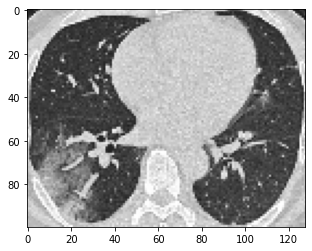

In [31]:
img_datared=pd.DataFrame()
for i in range(0,4):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getred(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i])

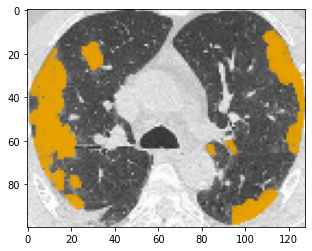

In [32]:
plt.imshow(all1[5])

4
(12800,)
5
(12800,)
6
(12800,)
7
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


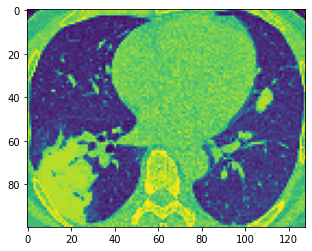

In [33]:
imgo_datared=pd.DataFrame()
for i in range(4,8): 
    print(i)
    dfro = getred(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [34]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [37]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Original Image    0.210325
Median s3         0.052470
Roberts           0.049829
Variance s3       0.048121
Scharr            0.047018
Sobel             0.046051
Prewitt           0.046029
Gaussian s7       0.044140
Gabor31           0.042868
Gaussian s3       0.042301
Gabor32           0.042128
Gabor24           0.041531
Gabor21           0.040070
Gabor29           0.039432
Gabor30           0.037274
Gabor6            0.036638
Gabor7            0.032624
Gabor8            0.026436
Gabor5            0.021112
Gabor23           0.018200
Gabor4            0.012650
Gabor12           0.006832
Gabor22           0.006667
Canny Edge        0.005161
Gabor11           0.004051
Gabor3            0.000043
Gabor14           0.000000
Gabor2            0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor20           0.000000
Gabor1            0.000000
Gabor16           0.000000
Gabor17           0.000000
Gabor28           0.000000
Gabor27           0.000000
G

In [38]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.360546875


In [39]:
pre_r=model.predict(X[0:w*h])
pre_r

array([ 34,  40,  55, ..., 201, 207, 200], dtype=uint8)

0.935390625


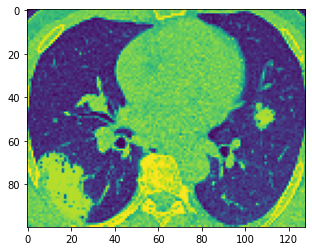

In [40]:
s=pre_r[0:w*h].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [41]:
import pickle
filename = "rrcol_model"
pickle.dump(model, open(filename, 'wb'))

# Green

(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                  34       0       0     249     126      81      41      33   
1                  36       0       0     255     136     100      44      40   
2                  55       0       0     255     167     128      54      52   
3                  65       0       0     255     218     152      70      62   
4                  46       0       0     255     255     180      94      73   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             183       0       0     255     255     255     188     139   
12796             212       0       0     255     255     255     187     140   
12797             201       0       0     255     255     255     187     139   
12798             207       0       0     255     255     255     187     138   
12799             208       0       0     255     255     255     187     135   

       Gabor8  Gab

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 190       0       0     255     255     255     181     134   
1                 199       0       0     255     255     255     181     134   
2                 200       0       0     255     255     255     182     134   
3                 209       0       0     255     255     255     182     134   
4                 197       0       0     255     255     255     182     134   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             240       0       0     255     255     255     215     156   
12796             222       0       0     255     255     255     211     156   
12797             234       0       0     255     255     255     207     155   
12798             218       0       0     255     255     255     204     153   
12799             215       0       0     255     255     255     203     152   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 201       0       0     255     255     255     189     139   
1                 212       0       0     255     255     255     189     140   
2                 204       0       0     255     255     255     189     139   
3                 215       0       0     255     255     255     189     139   
4                 203       0       0     255     255     255     189     139   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             218       0       0     255     255     255     194     143   
12796             212       0       0     255     255     255     194     143   
12797             204       0       0     255     255     255     194     143   
12798             211       0       0     255     255     255     195     143   
12799             234       0       0     255     255     255     195     144   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                  44       0       0     230     114      74      37      30   
1                  34       0       0     255     122      86      39      35   
2                  34       0       0     255     150     118      48      48   
3                  60       0       0     255     200     147      65      59   
4                  52       0       0     255     255     175      88      71   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             182       0       0     255     255     255     165     122   
12796             183       0       0     255     255     255     164     120   
12797             173       0       0     255     255     255     162     120   
12798             172       0       0     255     255     255     162     121   
12799             185       0       0     255     255     255     161     120   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


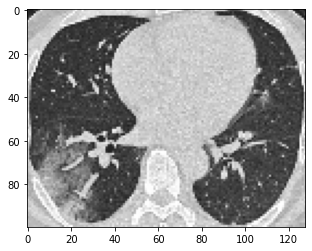

In [45]:
img_datared=pd.DataFrame()
for i in range(4):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getgreen(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i]) 

(12800,)
(12800,)
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


(12800,)


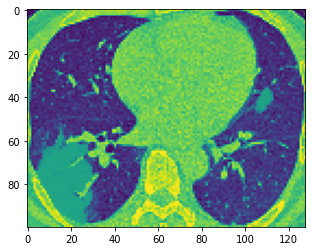

In [46]:
imgo_datared=pd.DataFrame()
for i in range(4,8): 
    dfro = getgreen(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [47]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [50]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Original Image    0.216075
Median s3         0.052486
Roberts           0.048980
Variance s3       0.047418
Prewitt           0.047178
Scharr            0.045701
Sobel             0.045236
Gaussian s7       0.043413
Gaussian s3       0.042855
Gabor32           0.042186
Gabor31           0.041895
Gabor24           0.041601
Gabor21           0.040200
Gabor29           0.039118
Gabor30           0.037244
Gabor6            0.036142
Gabor7            0.031927
Gabor8            0.026633
Gabor5            0.020538
Gabor23           0.018040
Gabor4            0.012651
Gabor22           0.006708
Gabor12           0.006690
Canny Edge        0.005132
Gabor11           0.003911
Gabor3            0.000041
Gabor14           0.000000
Gabor2            0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor20           0.000000
Gabor1            0.000000
Gabor16           0.000000
Gabor17           0.000000
Gabor28           0.000000
Gabor27           0.000000
G

In [51]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.363671875


0.93125


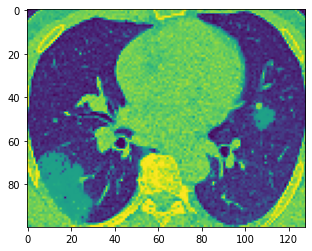

In [52]:
pre_r=model.predict(X[0:w*h])
s=pre_r[0:w*h].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [53]:
import pickle
filename = "gg_model"
pickle.dump(model, open(filename, 'wb'))

# Blue


(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                  34       0       0     249     126      81      41      33   
1                  36       0       0     255     136     100      44      40   
2                  55       0       0     255     167     128      54      52   
3                  65       0       0     255     218     152      70      62   
4                  46       0       0     255     255     180      94      73   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             183       0       0     255     255     255     188     139   
12796             212       0       0     255     255     255     187     140   
12797             201       0       0     255     255     255     187     139   
12798             207       0       0     255     255     255     187     138   
12799             208       0       0     255     255     255     187     135   

       Gabor8  Gab

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 190       0       0     255     255     255     181     134   
1                 199       0       0     255     255     255     181     134   
2                 200       0       0     255     255     255     182     134   
3                 209       0       0     255     255     255     182     134   
4                 197       0       0     255     255     255     182     134   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             240       0       0     255     255     255     215     156   
12796             222       0       0     255     255     255     211     156   
12797             234       0       0     255     255     255     207     155   
12798             218       0       0     255     255     255     204     153   
12799             215       0       0     255     255     255     203     152   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 201       0       0     255     255     255     189     139   
1                 212       0       0     255     255     255     189     140   
2                 204       0       0     255     255     255     189     139   
3                 215       0       0     255     255     255     189     139   
4                 203       0       0     255     255     255     189     139   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             218       0       0     255     255     255     194     143   
12796             212       0       0     255     255     255     194     143   
12797             204       0       0     255     255     255     194     143   
12798             211       0       0     255     255     255     195     143   
12799             234       0       0     255     255     255     195     144   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                  44       0       0     230     114      74      37      30   
1                  34       0       0     255     122      86      39      35   
2                  34       0       0     255     150     118      48      48   
3                  60       0       0     255     200     147      65      59   
4                  52       0       0     255     255     175      88      71   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             182       0       0     255     255     255     165     122   
12796             183       0       0     255     255     255     164     120   
12797             173       0       0     255     255     255     162     120   
12798             172       0       0     255     255     255     162     121   
12799             185       0       0     255     255     255     161     120   

       Gabor8  Gabor9  ... 

C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


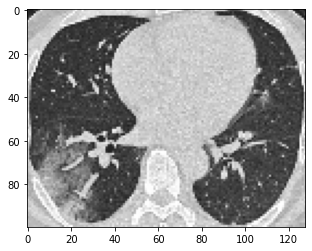

In [56]:
img_datared=pd.DataFrame()
for i in range(4):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getblue(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i])

(12800,)
(12800,)
(12800,)
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_17020/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


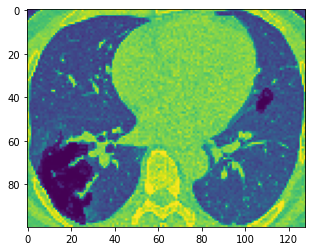

In [57]:
imgo_datared=pd.DataFrame()
for i in range(4,8): 
    dfro = getblue(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [58]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [60]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [61]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Original Image    0.216108
Median s3         0.050552
Roberts           0.048742
Prewitt           0.046916
Variance s3       0.046802
Scharr            0.045915
Sobel             0.044404
Gaussian s7       0.043698
Gabor24           0.042796
Gabor31           0.042720
Gabor32           0.042498
Gaussian s3       0.041842
Gabor21           0.040785
Gabor29           0.039821
Gabor30           0.037137
Gabor6            0.035594
Gabor7            0.031712
Gabor8            0.027024
Gabor5            0.020280
Gabor23           0.019180
Gabor4            0.012906
Gabor12           0.007036
Gabor22           0.006584
Canny Edge        0.004951
Gabor11           0.003953
Gabor3            0.000043
Gabor14           0.000000
Gabor2            0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor19           0.000000
Gabor20           0.000000
Gabor16           0.000000
Gabor28           0.000000
Gabor27           0.000000
Gabor26           0.000000
G

In [62]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.372265625


0.934140625


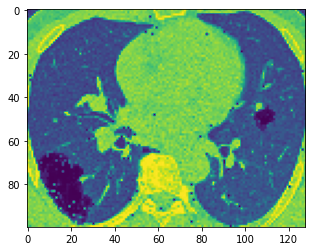

In [63]:
pre_r=model.predict(X[0:w*h])
s=pre_r[0:w*h].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [64]:
import pickle
filename = "bb_model"
pickle.dump(model, open(filename, 'wb'))

# Validation

In [65]:
import pickle
model_r=pickle.load(open('rrcol_model','rb'))  

In [66]:
import pickle
model_g=pickle.load(open('gg_model','rb')) 

In [67]:
import pickle
model_b=pickle.load(open('bb_model','rb')) 

C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\111.png
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_93.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_hosp34.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu45.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu46.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu47.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu48.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu49.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\non_covid_10.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\non_covid_100.jpg


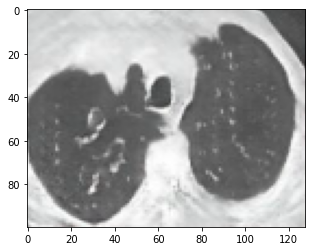

In [68]:
path=r'C:\Users\sudhakararao\Desktop\Project\divideddataset'
#l=['positive-hometratment','positive-hospitalize','positive-icu']
l1=['damaged']
all2=[]
for i in l1:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset): 
        imagepath=os.path.join(dataset,j)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all2.append(img)
        #print(c,end=" ")
        print(imagepath)
        c+=1
        if(c==10):
            break

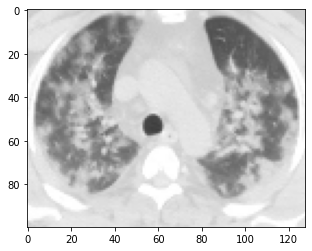

In [70]:
ck=2
plt.imshow(all2[ck])

(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 205       0       0     255     255     255     186     137   
1                 203       0       0     255     255     255     186     137   
2                 204       0       0     255     255     255     186     138   
3                 206       0       0     255     255     255     188     140   
4                 206       0       0     255     255     255     190     142   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             241       0       0     255     255     255     220     162   
12796             231       0       0     255     255     255     216     160   
12797             229       0       0     255     255     255     212     158   
12798             228       0       0     255     255     255     209     157   
12799             227       0       0     255     255     255     209     156   

       Gabor8  Gab

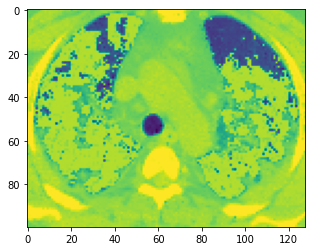

In [71]:
imgr=getred(all2[ck])
dfr = feature_extraction(imgr)
pre_r=model_r.predict(dfr)   
s_r=pre_r.reshape((h,w))
print(len(pre_r))
plt.imshow(s_r)

(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 205       0       0     255     255     255     186     137   
1                 203       0       0     255     255     255     186     137   
2                 204       0       0     255     255     255     186     138   
3                 206       0       0     255     255     255     188     140   
4                 206       0       0     255     255     255     190     142   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             241       0       0     255     255     255     220     162   
12796             231       0       0     255     255     255     216     160   
12797             229       0       0     255     255     255     212     158   
12798             228       0       0     255     255     255     209     157   
12799             227       0       0     255     255     255     209     156   

       Gabor8  Gab

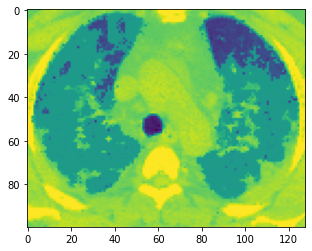

In [72]:
imgr=getgreen(all2[ck])
dfr = feature_extraction(imgr)
pre_g=model_g.predict(dfr)   
s_g=pre_g.reshape((h,w))
print(len(pre_g))
plt.imshow(s_g)

(12800,)
       Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0                 205       0       0     255     255     255     186     137   
1                 203       0       0     255     255     255     186     137   
2                 204       0       0     255     255     255     186     138   
3                 206       0       0     255     255     255     188     140   
4                 206       0       0     255     255     255     190     142   
...               ...     ...     ...     ...     ...     ...     ...     ...   
12795             241       0       0     255     255     255     220     162   
12796             231       0       0     255     255     255     216     160   
12797             229       0       0     255     255     255     212     158   
12798             228       0       0     255     255     255     209     157   
12799             227       0       0     255     255     255     209     156   

       Gabor8  Gab

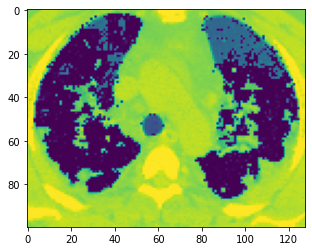

In [73]:
imgr=getblue(all2[ck])
dfr = feature_extraction(imgr)
pre_b=model_b.predict(dfr)   
s_b=pre_b.reshape((h,w))
print(len(pre_b))
plt.imshow(s_b)

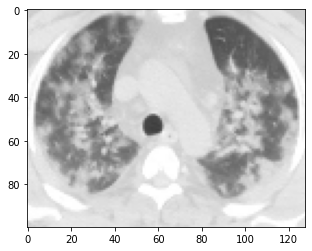

In [74]:
plt.imshow(all2[ck])

38400


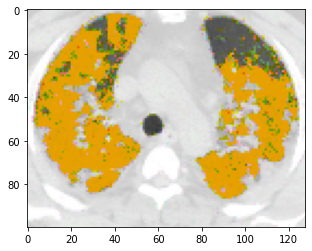

In [75]:
q=[]
for i in range(len(pre_b)):
  q.append(pre_r[i])
  q.append(pre_g[i])
  q.append(pre_b[i])
q=np.array(q)
print(len(q))
qq=np.reshape(q,(h,w,3))
plt.imshow(qq)

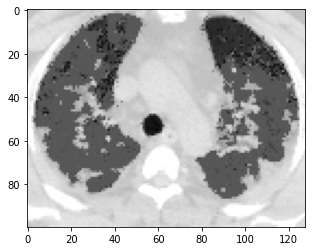

In [76]:
img = cv2.cvtColor(qq, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

In [77]:
print(img[20])

[210 208 207 207 206 211 213 209 245 255 255 243 186 197 168 121 121 118
 119 121 105 113 123 120 121 122 121 118 120 120 121 121 121 121 121 121
 120  99 107 106 104  94 102  90  73 165 176 206 210 213 212 209 211 211
 206 209 207 209 210 211 214 213 220 217 216 216 212 212 215 210 207 212
 213 213 211 215 211 207 209 209 209 203 205 202 197 125  93  88  92  71
  94  94  67 121 156  68  94  95 132  97  64  76  73 134 107  99  68  94
  97  95  71 102 134  70 165 215 226 255 255 255 227 226 232 235 234 234
 233 228]


In [78]:
summ=0
for i in range(h):
    count=0
    for j in range(w):
        #print(s_r[i][j],end=" ")
        if(img[i][j]>=120 and img[i][j]<=145):
            count=count+1
    summ+=count
    #print(count)
    #print(len(s_r[i]),end=" ")
print(summ,end=" ")

2680 

In [79]:
import pickle
total_pixels=pickle.load(open('sum_pix.pkl','rb')) 

In [80]:
result=(summ/total_pixels)*100
result

48.79825200291333